# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [1]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import numpy             as np
import tensorflow         as tf
from IPython.display      import Image

In [2]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


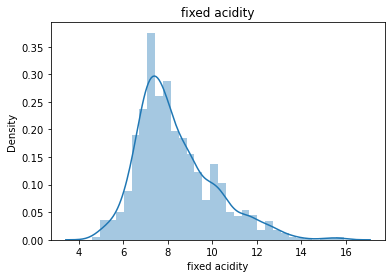

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


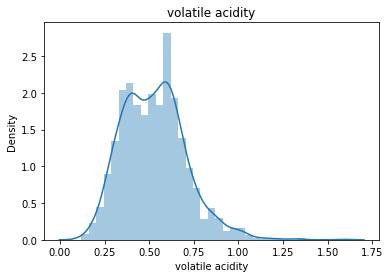

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


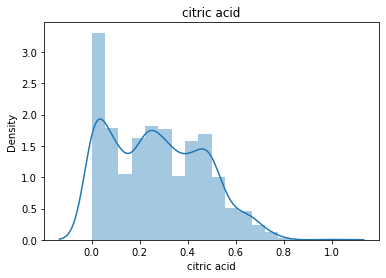

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


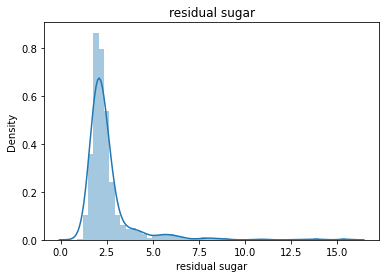

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


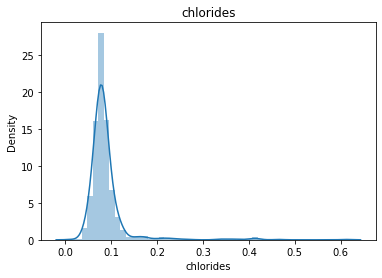

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


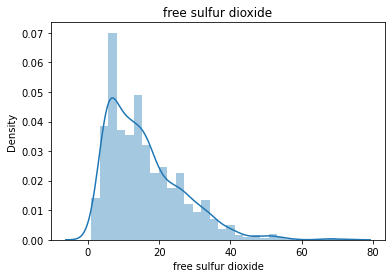

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


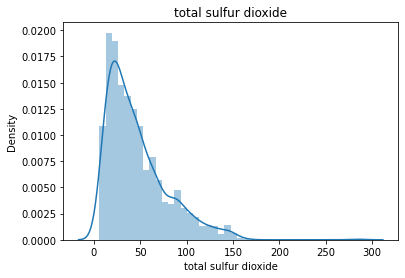

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


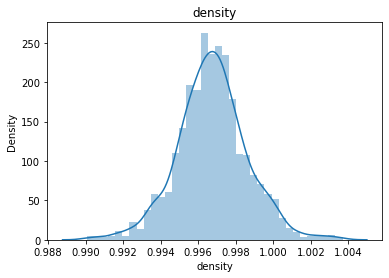

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


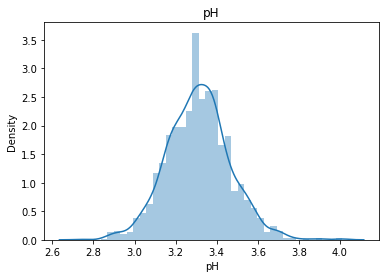

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


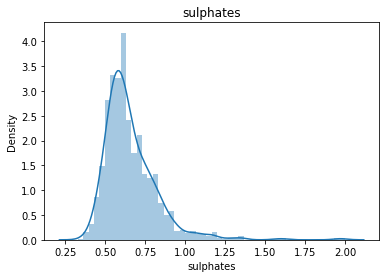

C:\Users\Ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


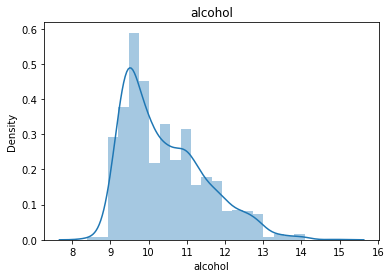

In [5]:
for var in data.columns[:-1]:
    sns.distplot(data[var])
    plt.title(var)
    plt.show()
    
    print("\n")
    

## Correlation

In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Feature selection

#### Tomare dos variables, Alcohol y Sulphates, ya que tienen en comun una distribucion mas o menos normal y son las variables con mayor correacion con la calidad, lo que significa que tienen la mas fuerte relacion lineal con la vaiable de calidad.

## Feature Engineering

In [7]:
dataset = data[['sulphates' ,'alcohol', 'quality']]
dataset['sulphates2'] = np.power(dataset['sulphates'], 2)
dataset['alcohol2'] = np.power(dataset['alcohol'], 2)
dataset['sulphates_x_alcohol'] = dataset['sulphates'] * dataset['alcohol']
dataset['bias'] = 1
dataset

<ipython-input-7-66e7477663c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sulphates2'] = np.power(dataset['sulphates'], 2)
<ipython-input-7-66e7477663c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['alcohol2'] = np.power(dataset['alcohol'], 2)
<ipython-input-7-66e7477663c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,sulphates,alcohol,quality,sulphates2,alcohol2,sulphates_x_alcohol,bias
0,0.56,9.4,5,0.3136,88.36,5.264,1
1,0.68,9.8,5,0.4624,96.04,6.664,1
2,0.65,9.8,5,0.4225,96.04,6.370,1
3,0.58,9.8,6,0.3364,96.04,5.684,1
4,0.56,9.4,5,0.3136,88.36,5.264,1
...,...,...,...,...,...,...,...
1594,0.58,10.5,5,0.3364,110.25,6.090,1
1595,0.76,11.2,6,0.5776,125.44,8.512,1
1596,0.75,11.0,6,0.5625,121.00,8.250,1
1597,0.71,10.2,5,0.5041,104.04,7.242,1


In [8]:
x = dataset[['bias', 'sulphates', 'alcohol', 'sulphates2', 'alcohol2', 'sulphates_x_alcohol']].to_numpy()
y = dataset[['quality']].to_numpy()

In [9]:
len(x), x[:10].reshape([-1,1]).shape

(1599, (60, 1))

In [10]:
x[:10].shape

(10, 6)

In [11]:
y[:10].reshape([-1,1]).shape

(10, 1)

## Model

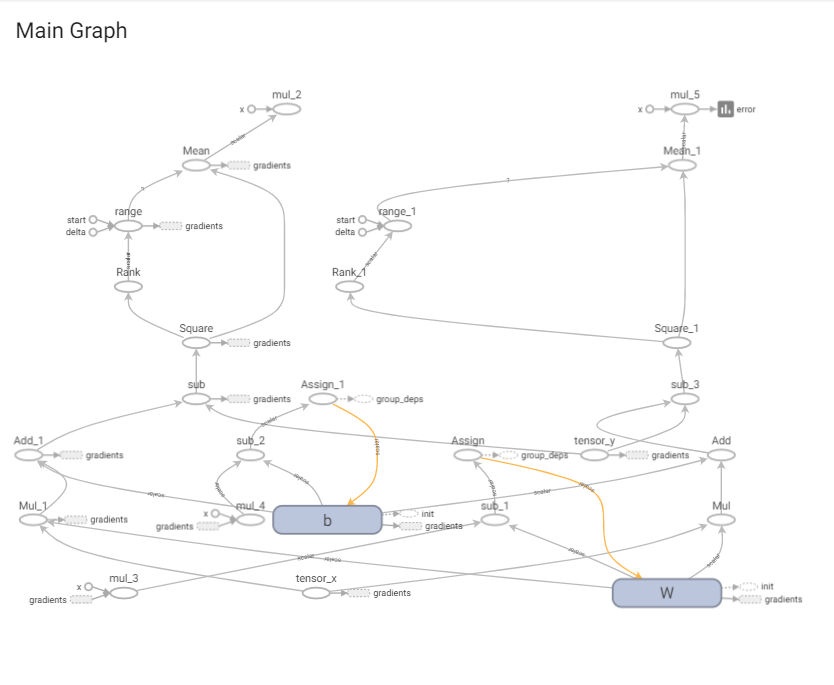

In [12]:
Image("grafo.png")

In [13]:
class ModeloLineal:
    def __init__(self):
        tf.reset_default_graph()
        self.W = tf.get_variable("W", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
        self.b = tf.get_variable("b", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
        

    def predict(self, x):
        return tf.add(tf.multiply(self.W, x), self.b)

    def update(self, x, y, learning_rate):
        prediction = self.predict(x)
        error = .5 * tf.reduce_mean(tf.math.square(y - prediction))
        gradient = tf.gradients(error, [self.W, self.b])
        updatew = tf.assign(self.W, self.W - learning_rate * gradient[0] )
        updateb = tf.assign(self.b, self.b - learning_rate * gradient[1] )
        update_params = tf.group(updatew, updateb)
        return update_params
    
    def mini_batches(self, x, y, batch_size):
        for batch_iteration in range(int(len(x)/batch_size)):
            init_batch = batch_iteration * batch_size
            end_batch = init_batch + batch_size
            yield np.array(x[init_batch:end_batch]), np.array(y[init_batch:end_batch].reshape([-1,1]))
            
    def parse_config(self, config_string):
        parameters = {}
        for conf in config_string.split('_')[1:]:
            parameters[conf.split('=')[0]] = conf.split('=')[1]
        return parameters
        
    def train(self, x, y, conf_string):
        config = self.parse_config(conf_string)
        lr = float(config['lr'])
        epochs = int(config['epochs'])
        batch_size = int(config['batchsize'])
        log_epoch = int(config['logepoch'])
        
        tensor_x = tf.placeholder("float", name="tensor_x")
        tensor_y = tf.placeholder("float", name="tensor_y")
        
        prediction = self.predict(tensor_x)
        update_params = self.update(tensor_x, tensor_y, lr)
        error = .5 * tf.reduce_mean(tf.math.square(tensor_y - prediction))
        error_sum = tf.summary.scalar("Error", error)
        init = tf.global_variables_initializer()
        
        with tf.Session() as session:
            writer = tf.summary.FileWriter(f'./experimentos/{conf_string}', session.graph)
            session.run(init)
            for epoch in range(epochs):
                for mini_x, mini_y in self.mini_batches(x, y, batch_size):
#                     break
                    feed_dict = {tensor_x: mini_x, tensor_y: mini_y}    
                    session.run(update_params, feed_dict=feed_dict)
                    predictions = session.run(prediction, feed_dict=feed_dict)
#                     break
                    
                if (epoch % log_epoch == 0):
                    w_value = session.run(self.W)
                    b_value = session.run(self.b)
                    error_value = session.run(error, feed_dict={tensor_x : x, tensor_y : y})
                    print(f"Epoch: {epoch}, W: {w_value}, b: {b_value}, error: {error_value}")
                    writer.add_summary(session.run(error_sum, feed_dict= {tensor_x : x, tensor_y : y}), epoch)

In [14]:
modelo = ModeloLineal()

## Modelo 1

In [15]:
configuration_string = "poli_epochs=10_lr=0.000001_batchsize=16_logepoch=1"    

modelo.train(x, y, configuration_string)

Epoch: 0, W: 0.010952318087220192, b: 0.0005458102677948773, error: 14.985397338867188
Epoch: 1, W: 0.019826989620923996, b: 0.001070444704964757, error: 14.181254386901855
Epoch: 2, W: 0.02701799012720585, b: 0.001577912364155054, error: 13.65217399597168
Epoch: 3, W: 0.032844576984643936, b: 0.0020714623387902975, error: 13.303787231445312
Epoch: 4, W: 0.03756546601653099, b: 0.002553727012127638, error: 13.074131965637207
Epoch: 5, W: 0.04139032959938049, b: 0.003026839578524232, error: 12.922472953796387
Epoch: 6, W: 0.04448910057544708, b: 0.003492529969662428, error: 12.822083473205566
Epoch: 7, W: 0.046999409794807434, b: 0.0039521981962025166, error: 12.755380630493164
Epoch: 8, W: 0.04903290420770645, b: 0.0044069793075323105, error: 12.71082878112793
Epoch: 9, W: 0.050679974257946014, b: 0.004857794847339392, error: 12.680838584899902


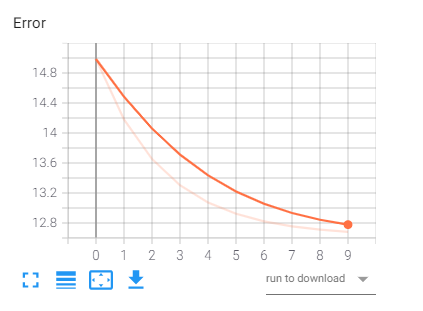

In [22]:
Image("modelo1.png")

## Modelo 2

In [17]:
configuration_string = "poli_epochs=100_lr=0.00001_batchsize=16_logepoch=10"    

modelo.train(x, y, configuration_string)

Epoch: 0, W: 0.04985702037811279, b: 0.004865698516368866, error: 12.694032669067383
Epoch: 10, W: 0.05620585009455681, b: 0.048169635236263275, error: 12.438721656799316
Epoch: 20, W: 0.05578052997589111, b: 0.09106911718845367, error: 12.252718925476074
Epoch: 30, W: 0.05535848066210747, b: 0.13363775610923767, error: 12.069575309753418
Epoch: 40, W: 0.05493968725204468, b: 0.17587824165821075, error: 11.88924503326416
Epoch: 50, W: 0.05452412739396095, b: 0.2177930772304535, error: 11.711676597595215
Epoch: 60, W: 0.054111775010824203, b: 0.2593848705291748, error: 11.536842346191406
Epoch: 70, W: 0.05370258912444115, b: 0.3006557822227478, error: 11.364688873291016
Epoch: 80, W: 0.053296562284231186, b: 0.3416087329387665, error: 11.195180892944336
Epoch: 90, W: 0.05289366468787193, b: 0.3822461664676666, error: 11.028273582458496


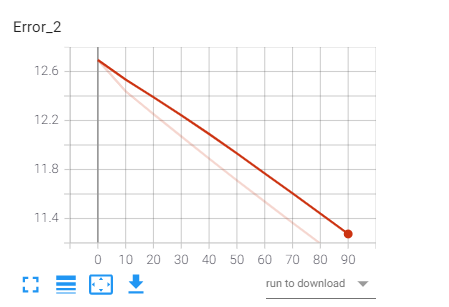

In [23]:
Image("modelo2.png")

## Modelo 3

In [18]:
configuration_string = "poli_epochs=10000_lr=0.000001_batchsize=16_logepoch=1000"    

modelo.train(x, y, configuration_string)

Epoch: 0, W: 0.010952318087220192, b: 0.0005458102677948773, error: 14.985397338867188
Epoch: 1000, W: 0.05355066806077957, b: 0.41893312335014343, error: 10.877400398254395
Epoch: 2000, W: 0.04963892325758934, b: 0.8057265877723694, error: 9.364686965942383
Epoch: 3000, W: 0.04601855203509331, b: 1.1637084484100342, error: 8.068879127502441
Epoch: 4000, W: 0.04266800731420517, b: 1.4950052499771118, error: 6.958934307098389
Epoch: 5000, W: 0.039566781371831894, b: 1.8016531467437744, error: 6.008045196533203
Epoch: 6000, W: 0.03669760376214981, b: 2.0853562355041504, error: 5.193782329559326
Epoch: 7000, W: 0.03404005244374275, b: 2.348129987716675, error: 4.495725631713867
Epoch: 8000, W: 0.031581275165081024, b: 2.5912606716156006, error: 3.897932529449463
Epoch: 9000, W: 0.029306409880518913, b: 2.81619930267334, error: 3.386030673980713


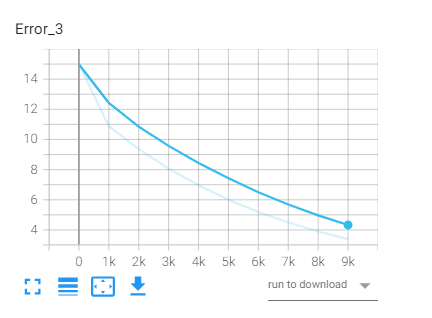

In [24]:
Image("modelo3.png")

## Modelo 4

In [19]:
configuration_string = "poli_epochs=1000_lr=0.0001_batchsize=16_logepoch=100"    

modelo.train(x, y, configuration_string)

Epoch: 0, W: 0.05529019236564636, b: 0.04389607906341553, error: 12.460734367370605
Epoch: 100, W: 0.0255107544362545, b: 3.043912410736084, error: 2.9106099605560303
Epoch: 200, W: 0.011762167327105999, b: 4.428961277008057, error: 0.8760861158370972
Epoch: 300, W: 0.005414634943008423, b: 5.068419933319092, error: 0.442920982837677
Epoch: 400, W: 0.0024840354453772306, b: 5.363652229309082, error: 0.3508213758468628
Epoch: 500, W: 0.0011309448163956404, b: 5.499963760375977, error: 0.3312971591949463
Epoch: 600, W: 0.0005063466960564256, b: 5.5628862380981445, error: 0.3271859586238861
Epoch: 700, W: 0.00021802406990900636, b: 5.591932773590088, error: 0.32633233070373535
Epoch: 800, W: 8.496684313286096e-05, b: 5.605337142944336, error: 0.3261609375476837
Epoch: 900, W: 2.369965659454465e-05, b: 5.611509323120117, error: 0.3261294364929199


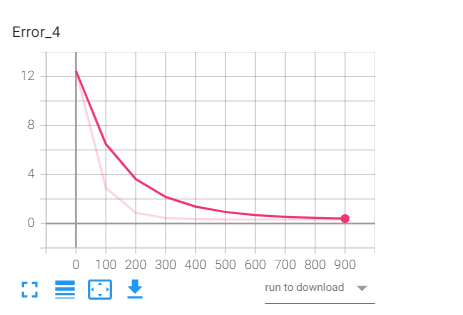

In [25]:
Image("modelo4.png")

## Modelo 5

In [21]:
configuration_string = "poli_epochs=10000_lr=0.0001_batchsize=128_logepoch=1000"    

modelo.train(x, y, configuration_string)

Epoch: 0, W: 0.05319961532950401, b: 0.0058286250568926334, error: 12.644909858703613
Epoch: 1000, W: 0.022709891200065613, b: 3.4185009002685547, error: 2.2104365825653076
Epoch: 2000, W: 0.009517736732959747, b: 4.753957271575928, error: 0.6145316362380981
Epoch: 3000, W: 0.004355411510914564, b: 5.276544570922852, error: 0.369678795337677
Epoch: 4000, W: 0.0023352003190666437, b: 5.481053352355957, error: 0.3319982886314392
Epoch: 5000, W: 0.0015446547186002135, b: 5.561080455780029, error: 0.3261566460132599
Epoch: 6000, W: 0.0012353311758488417, b: 5.59239387512207, error: 0.3252340853214264
Epoch: 7000, W: 0.0011140578426420689, b: 5.604670524597168, error: 0.3250816762447357
Epoch: 8000, W: 0.0010668863542377949, b: 5.609445571899414, error: 0.32505419850349426
Epoch: 9000, W: 0.001048067002557218, b: 5.6113505363464355, error: 0.32504820823669434


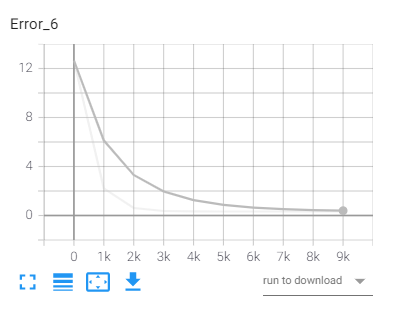

In [26]:
Image("modelo5.png")

## Conclusion

El mejor modelo a mi criterio es el modelo 4, se entro con la configuracion de 1000 epochs, minibatches de 16 registros, con un learning_rate del 0.0001. El modelo 5 llega a un error un poco mas bajo que el del modelo seleccionado pero es mas complejo y tal vez no tan generzalizado como el modelo 4 que tiene abtches mas pequeños, ademas de lograr esa reduccion de error con solo 1000 epochs en comparacion con el modelo 5 que utilizo 10,000.

El error RMSE del modelo 4 llego a un 0.32.